# Data Analysis on Stack Overflow Developer Survey 2023

In [1]:
import pandas as pd
import numpy as np

## Data Reading

#### Read the raw data from `survey_results_public.csv` & `survey_results_schema.csv` file.

In [2]:
survey_raw_df = pd.read_csv('./data/survey_results_public.csv')
survey_raw_df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


#### Total rows are `89184` along with `84` columns 

In [3]:
survey_raw_df.shape

(89184, 84)

In [4]:
survey_raw_df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [5]:
schema_raw = pd.read_csv('./data/survey_results_schema.csv')
schema_raw

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
76,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
77,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
78,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
79,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


In [6]:
schema_raw = pd.read_csv('./data/survey_results_schema.csv', index_col='qname').question

#### Total number of selected columns are `15`, from which data analysis would be done.

In [7]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'EdLevel',
    'CodingActivities',
    'LearnCodeOnline',
    # Programming Experience
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'AIDevHaveWorkedWith',
    'AIDevWantToWorkWith',
    'AISearchHaveWorkedWith',
    'AISearchWantToWorkWith',
    # Employment
    'Employment',
    'DevType'
]

In [8]:
len(selected_columns)

15

#### Copy the selected columns and use it as our dataframe, which will be stored in `survey_df`

In [9]:
survey_df = survey_raw_df[selected_columns].copy()

In [10]:
schema = schema_raw[selected_columns]

In [11]:
survey_df.shape

(89184, 15)

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 87973 non-null  object
 1   Age                     89184 non-null  object
 2   EdLevel                 87973 non-null  object
 3   CodingActivities        73764 non-null  object
 4   LearnCodeOnline         70084 non-null  object
 5   YearsCode               87435 non-null  object
 6   YearsCodePro            66136 non-null  object
 7   LanguageHaveWorkedWith  87140 non-null  object
 8   LanguageWantToWorkWith  80709 non-null  object
 9   AIDevHaveWorkedWith     25904 non-null  object
 10  AIDevWantToWorkWith     19587 non-null  object
 11  AISearchHaveWorkedWith  56328 non-null  object
 12  AISearchWantToWorkWith  46150 non-null  object
 13  Employment              87898 non-null  object
 14  DevType                 76872 non-null  object
dtypes:

## Data Cleaning

##### Converted the Datatype of `YearsCode` & `YearsCodePro` into float

In [13]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [14]:
survey_df.describe()

,YearsCode,YearsCodePro
count,86114.000000,64217.000000
mean,13.972049,11.508354
std,10.259548,9.070346
min,1.000000,1.000000
25%,6.000000,5.000000
50%,11.000000,9.000000
75%,20.000000,16.000000
max,50.000000,50.000000


##### A sample/glimpse of our dataset

In [15]:
survey_df.sample(5)

,Country,Age,EdLevel,CodingActivities,LearnCodeOnline,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,Employment,DevType
43899,Brazil,Under 18 years old,Primary/elementary school,NaN,Formal documentation provided by the owner of ...,2.0,NaN,C++;Dart;HTML/CSS;Python,C#;C++;Dart;HTML/CSS;JavaScript;Kotlin;Python;...,GitHub Copilot,GitHub Copilot;Replit Ghostwriter,NaN,NaN,"Student, full-time",NaN
60915,United States of America,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hobby;Contribute to open-source projects,Formal documentation provided by the owner of ...,19.0,9.0,Bash/Shell (all shells);Go,Bash/Shell (all shells);Go;Rust,NaN,NaN,NaN,NaN,"Employed, full-time","Engineer, data"
58430,United Kingdom of Great Britain and Northern I...,18-24 years old,"Secondary school (e.g. American high school, G...",NaN,Formal documentation provided by the owner of ...,6.0,NaN,Assembly;Bash/Shell (all shells);C;C++;JavaScr...,Assembly;Bash/Shell (all shells);C;C++;Go;Hask...,NaN,NaN,WolframAlpha,NaN,"Student, full-time",NaN
75133,Romania,35-44 years old,Some college/university study without earning ...,Hobby;Contribute to open-source projects,Formal documentation provided by the owner of ...,17.0,17.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Bash/Shell (all shells);Haskell;HTML/CSS;JavaS...,NaN,NaN,NaN,NaN,"Employed, full-time","Developer, full-stack"
24637,United Kingdom of Great Britain and Northern I...,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Hobby,Formal documentation provided by the owner of ...,36.0,17.0,C;C#;HTML/CSS;JavaScript;Python,C;C#;HTML/CSS;JavaScript;Python,NaN,NaN,NaN,NaN,"Employed, full-time","Developer, embedded applications or devices"


## Data Visualization

#### Imported relevant modules and setup the basic configurations

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Top 10 Countries with most response

In [17]:
survey_df.Country.nunique()

185

In [18]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: Country, dtype: int64

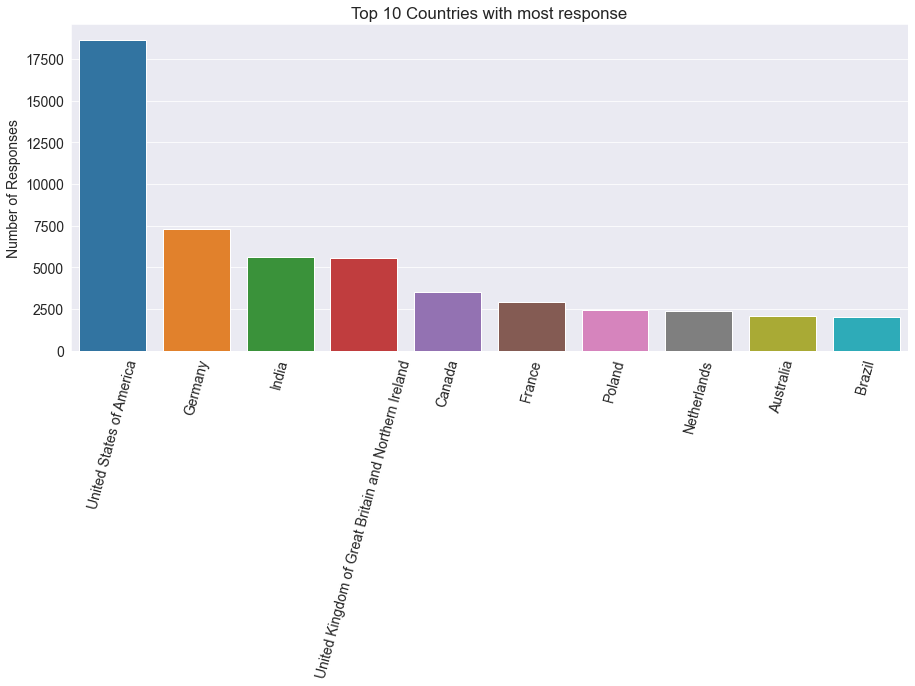

In [149]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=75)
plt.title("Top 10 Countries with most response")
sns.barplot(x=top_countries.index, y=top_countries)
plt.ylabel("Number of Responses");

The above graph shows the Top 10 countries with most responses, which were `United States of America`, followed by `Germany` & others.

#### Education Level of Respondents

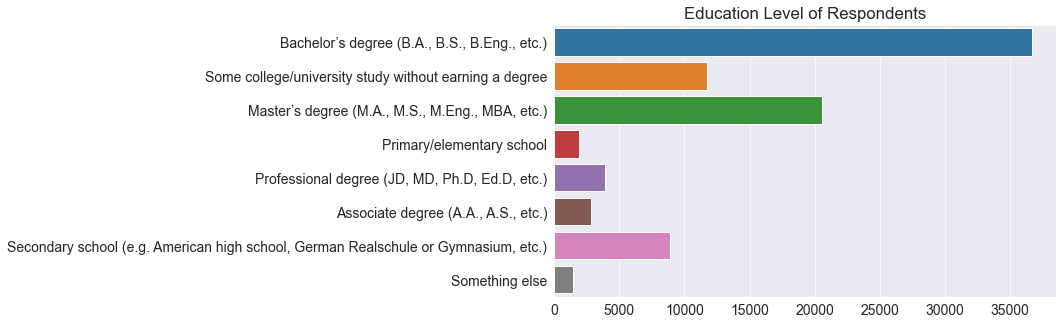

In [148]:
sns.countplot(y=survey_df.EdLevel)
plt.title("Education Level of Respondents")
plt.xlabel(None)
plt.ylabel(None);

The above graph shows the highest education level of respondents with `Bachelor's Degree`, followed by `Master's Degree` & others.

#### Employment Status

In [22]:
testing = survey_df.Employment.value_counts()
testing

Employed, full-time                                                                                                                                   53748
Student, full-time                                                                                                                                     7430
Independent contractor, freelancer, or self-employed                                                                                                   7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               4354
Not employed, but looking for work                                                                                                                     2553
                                                                                                                                                      ...  
Employed, full-time;Independent contractor, freelancer, or self-

##### A helper function to split the `;` in Data Frame

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over column
    for index, value in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as column result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in option column as True
            result_df.at[index, option] = True
    return result_df[options]

In [90]:
emplyment_df = split_multicolumn(survey_df.Employment)

In [91]:
total_employment_percentage = ((emplyment_df.mean()).sort_values(ascending=False))*100
total_employment_percentage

Employed, full-time                                     68.284670
Independent contractor, freelancer, or self-employed    15.684428
Student, full-time                                      13.195192
Employed, part-time                                      5.638904
Not employed, but looking for work                       4.684697
Student, part-time                                       3.801130
Not employed, and not looking for work                   1.547363
Retired                                                  0.826381
I prefer not to say                                      0.615581
dtype: float64

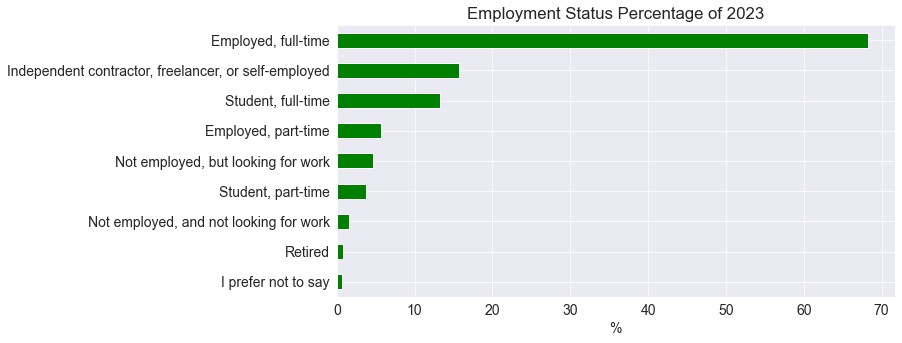

In [141]:
plt.figure(figsize=(10, 5))
(total_employment_percentage.sort_values(ascending=True)).plot(kind='barh', color='g')
plt.title("Employment Status Percentage of 2023")
plt.xlabel("%");

The above graph shows that the highest percent of employment in 2023 was of `Full-Time Employment`, followed by `Freelancer or Self-Employed`, `Full-Time Student` & others.

#### Developers

In [77]:
survey_df.DevType.value_counts().head(15)

Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
DevOps specialist                                 1387
Academic researcher                               1354
Research & Development role                       1353
Senior Executive (C-Suite, VP, etc.)              1332
Engineer, data                                    1248
Name: DevType, dtype: int64

In [29]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [30]:
dev_type_percentage = ((dev_type_df.mean()).sort_values(ascending=False))*100

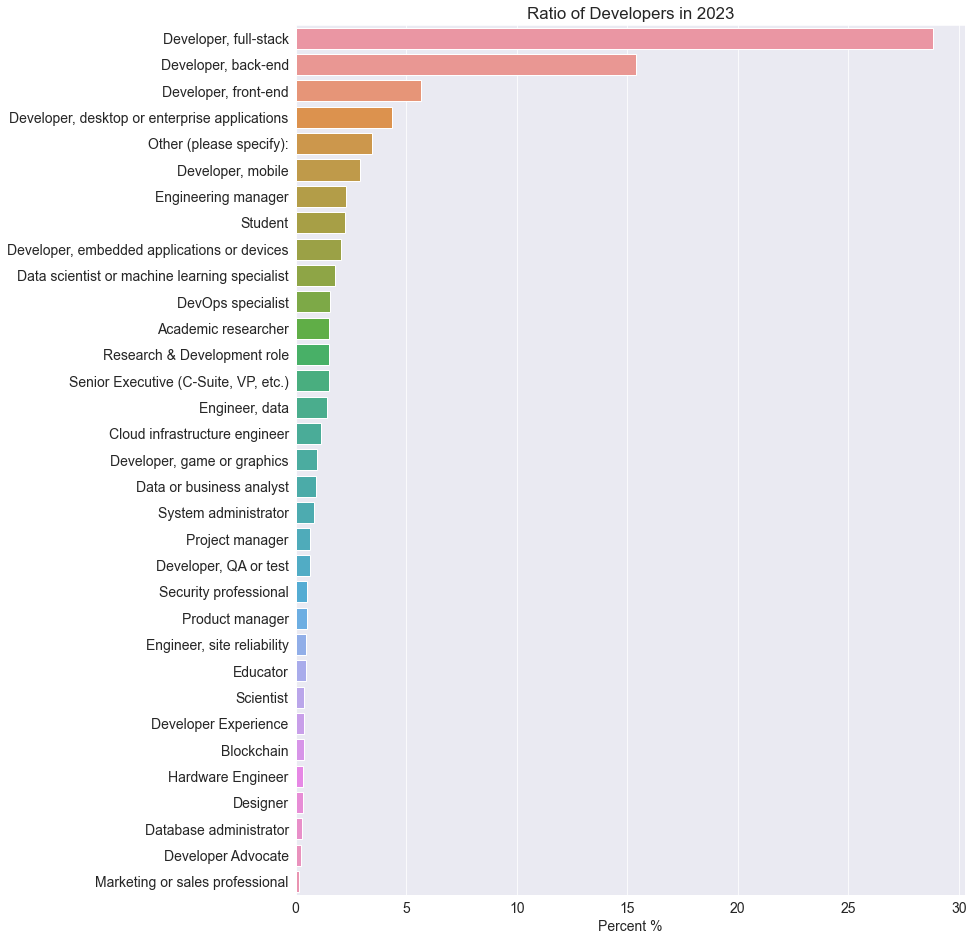

In [76]:
plt.figure(figsize=(12, 16))
plt.xlabel("Percent %")
sns.barplot(x=dev_type_percentage, y=dev_type_percentage.index)
plt.title("Ratio of Developers in 2023");

The above graph shows that the highest ratio of developers in 2023 was of `Full-Stack Developer`, followed by `Back-End Developer`, `Front-End Developer` & others.

#### Languages used in 2023

In [32]:
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [75]:
languages_worked_df_percentage = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_df_percentage.head(10)

JavaScript                 62.467483
HTML/CSS                   52.022784
Python                     48.392088
SQL                        47.792205
TypeScript                 38.169403
Bash/Shell (all shells)    31.789334
Java                       30.002018
C#                         27.127063
C++                        22.015160
C                          18.994438
dtype: float64

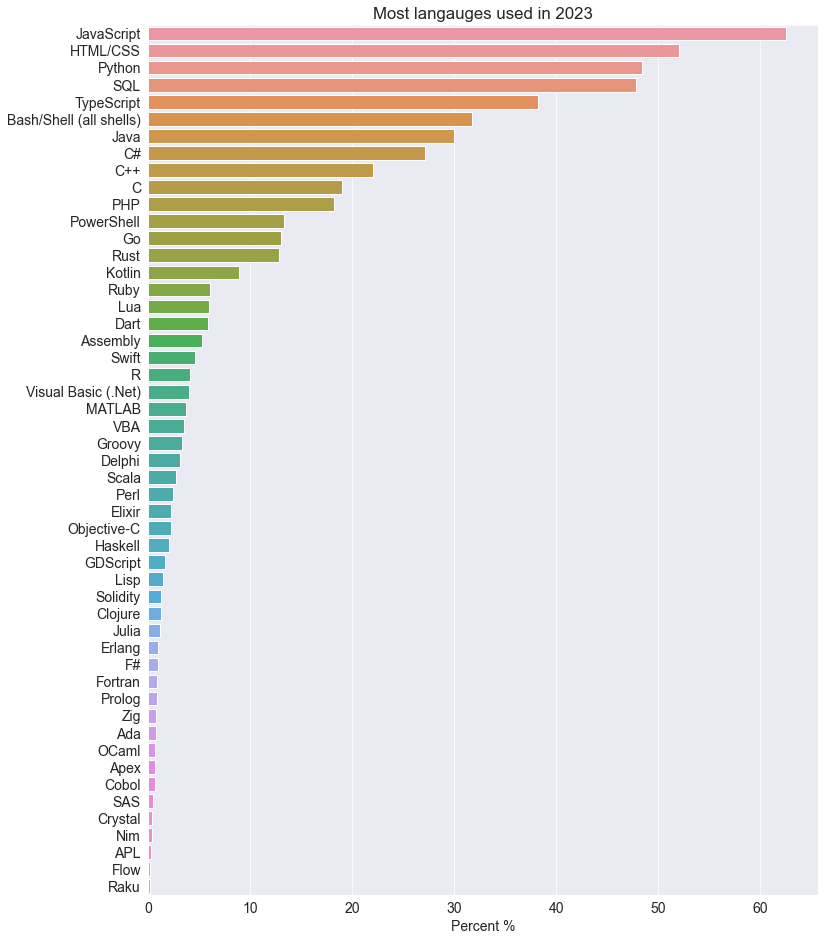

In [74]:
plt.figure(figsize=(12, 16))
plt.xlabel("Percent %")
sns.barplot(x=languages_worked_df_percentage, y=languages_worked_df_percentage.index)
plt.title("Most langauges used in 2023");

The above graph shows that the most Loved programming language of 2023 was `JavaScript`, followed by `HTML/CSS` & others.

#### Languages, People are interested in learning over next years

In [73]:
languages_interested_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
languages_interested_df_percentage = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_df_percentage.head(10)

JavaScript                 39.229010
Python                     38.925144
TypeScript                 36.167922
HTML/CSS                   33.557589
SQL                        33.187567
Rust                       29.949318
C#                         20.847910
Bash/Shell (all shells)    20.495829
Go                         20.175144
Java                       16.128454
dtype: float64

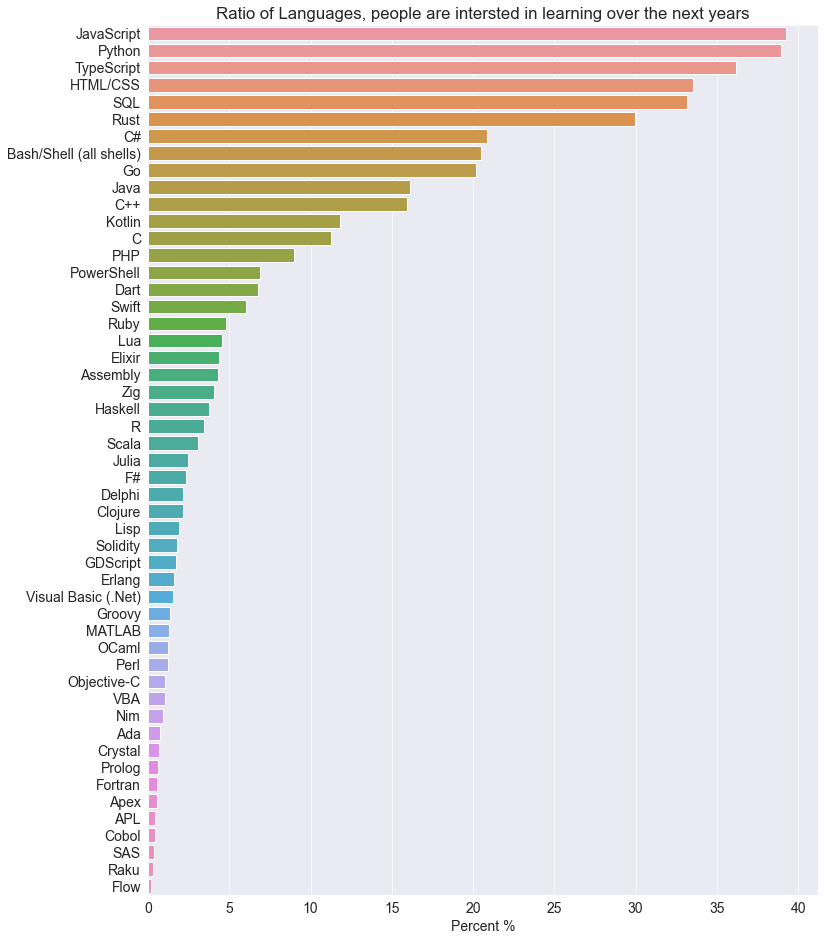

In [72]:
plt.figure(figsize=(12, 16))
sns.barplot(x=languages_interested_df_percentage, y=languages_interested_df_percentage.index)
plt.title("Ratio of Languages, people are intersted in learning over the next years")
plt.xlabel('Percent %');

The above graph shows that the programming language, which people are interseted for learning in future are `JavaScript`, followed by `Python`, `Typescript` & others.

#### Most Loved languages of 2023

In [71]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_df_percentage = (languages_loved_df.sum() * 100 / languages_worked_df.sum()).sort_values(ascending=False)
languages_loved_df_percentage.head(10)

Rust          84.659141
Elixir        73.126233
TypeScript    71.704709
Zig           71.330590
Clojure       68.506787
Python        65.522035
Raku          65.384615
SQL           64.258734
GDScript      62.943144
C#            62.865292
dtype: float64

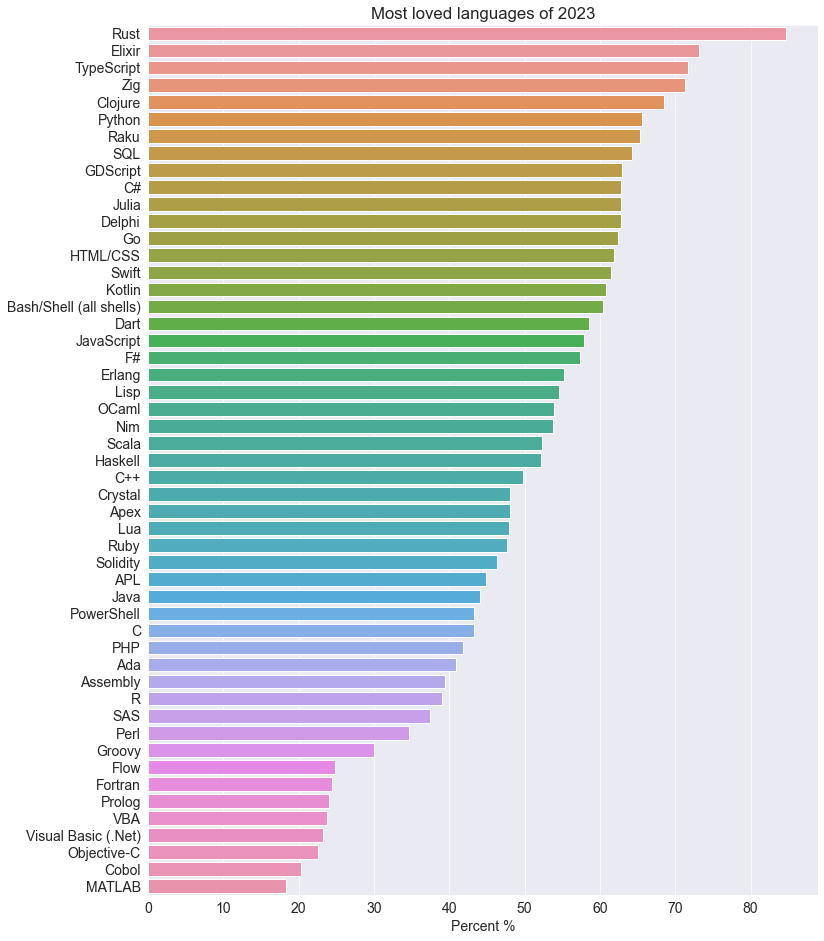

In [70]:
plt.figure(figsize=(12, 16))
sns.barplot(x=languages_loved_df_percentage, y=languages_loved_df_percentage.index)
plt.title("Most loved languages of 2023")
plt.xlabel('Percent %');

The above graph shows that the most Loved programming language of 2023 was `Rust`, followed by `Elixir` & others.

#### Most dreaded languages of 2023

In [69]:
languages_dreaded_df = ~languages_interested_df
languages_dreaded_percentage = languages_dreaded_df.mean().sort_values(ascending=False) * 100
languages_dreaded_percentage.head(10)

Flow       99.797049
Raku       99.687164
SAS        99.601947
Cobol      99.557095
APL        99.543640
Apex       99.460666
Fortran    99.430391
Prolog     99.374327
Crystal    99.328355
Ada        99.259957
dtype: float64

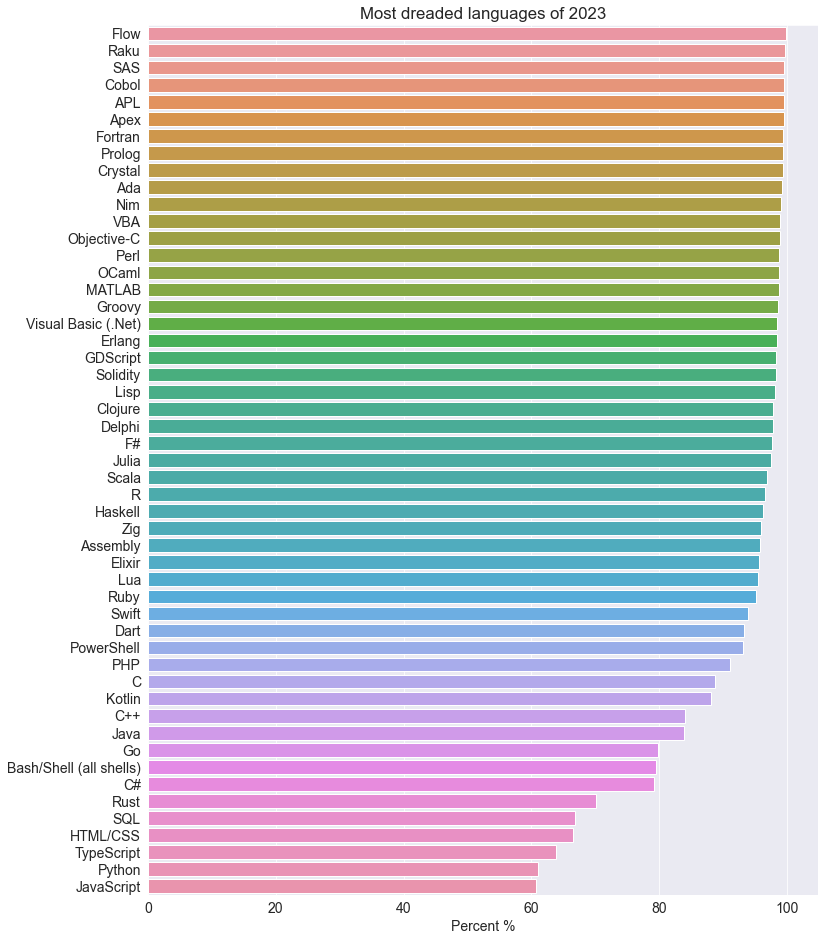

In [68]:
plt.figure(figsize=(12, 16))
sns.barplot(x=languages_dreaded_percentage, y=languages_dreaded_percentage.index)
plt.title("Most dreaded languages of 2023")
plt.xlabel('Percent %');

The above graph shows that the most Dreaded programming language of 2023 was `Flow`, followed by `Raku` & others.

#### AI-Powered developer tools used in 2023

In [41]:
ai_dev_worked = split_multicolumn(survey_df.AIDevHaveWorkedWith)

In [55]:
ai_dev_worked_percentage = ai_dev_worked.mean().sort_values(ascending=False) * 100

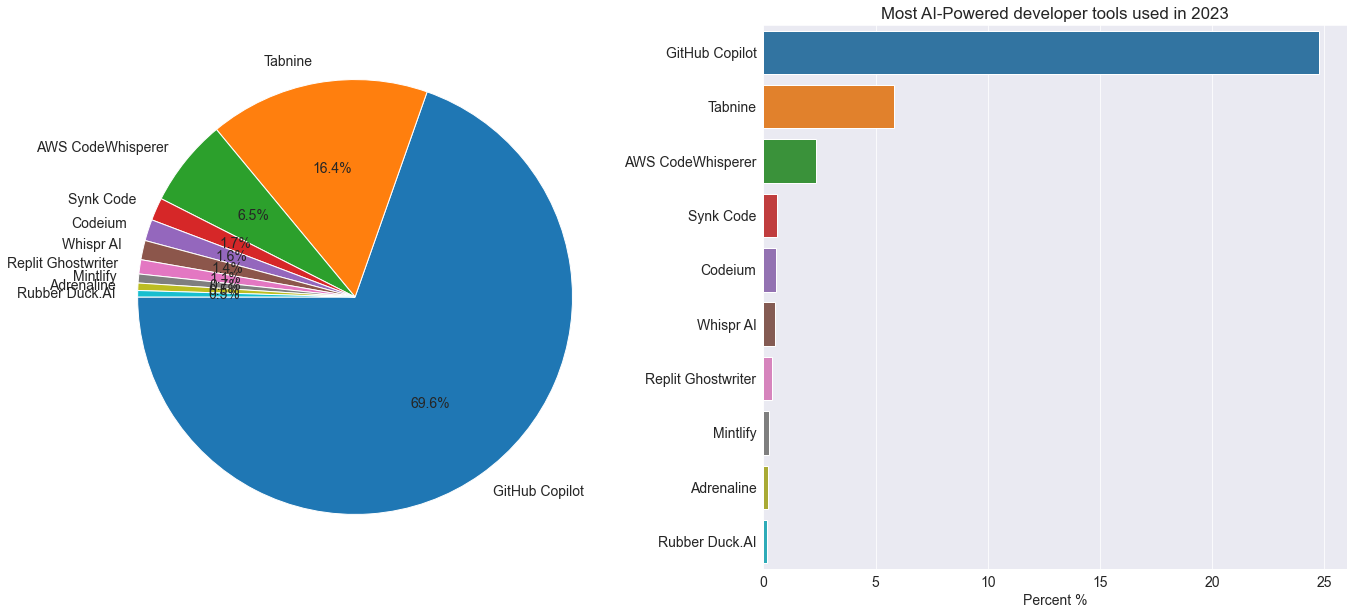

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(23, 10))
plt.title("Most AI-Powered developer tools used in 2023")

axes[0].pie(ai_dev_worked_percentage, labels=ai_dev_worked_percentage.index, autopct='%1.1f%%', startangle=180);

axes[1].set_xlabel("Percent %")
sns.barplot(x=ai_dev_worked_percentage, y=ai_dev_worked_percentage.index);

The above graph & chart shows that the most AI-Powered developer tool used in 2023 was `GitHub Copilot`, followed by `Tabnine`, `AWS CodeWhisperer` & others.

#### AI-Powered developer tools, people are intersted in learning over next years

In [44]:
ai_dev_interested = split_multicolumn(survey_df.AIDevWantToWorkWith)

In [57]:
ai_dev_interested_percentage = ai_dev_interested.mean().sort_values(ascending=False) * 100
ai_dev_interested_percentage

GitHub Copilot        19.402583
AWS CodeWhisperer      3.415411
Tabnine                2.484751
Whispr AI              0.920569
Replit Ghostwriter     0.621188
Codeium                0.599883
Synk Code              0.593156
Rubber Duck.AI         0.404781
Adrenaline             0.303866
Mintlify               0.283683
dtype: float64

The above data-set shows that the most AI-Powered developer tool, that people are interested to work/learn in future is `GitHub Copilot`, followed by `AWS CodeWhisperer`, `Tabnine` & others.

#### AI-Powered search tools used in 2023

In [46]:
ai_search_worked = split_multicolumn(survey_df.AISearchHaveWorkedWith)

In [58]:
ai_search_worked_percentage = ai_search_worked.mean().sort_values(ascending=False) * 100

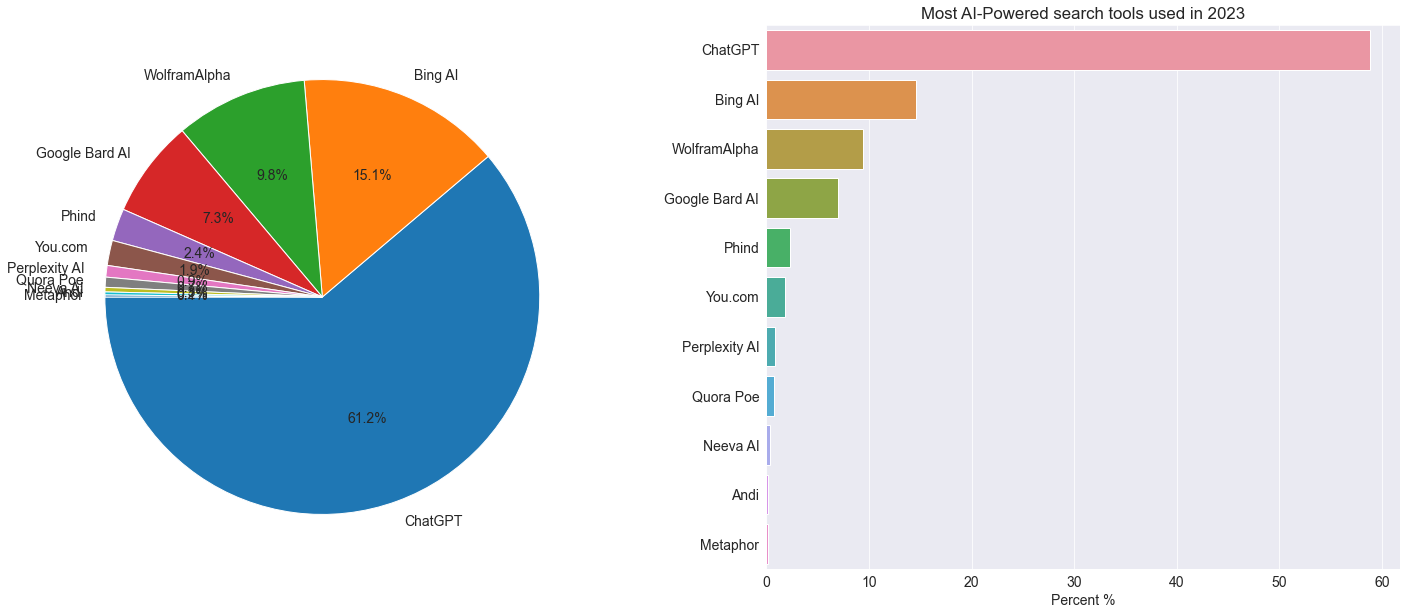

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
plt.title("Most AI-Powered search tools used in 2023")

axes[0].pie(ai_search_worked_percentage, labels=ai_search_worked_percentage.index, autopct='%1.1f%%', startangle=180);

axes[1].set_xlabel("Percent %")
sns.barplot(x=ai_search_worked_percentage, y=ai_search_worked_percentage.index);

The above graph & chart shows that the most AI-Powered search tool in 2023 was `ChatGPT`, followed by `Bing AI` & others.

#### AI-Powered search tools, people are interested in learning over next years

In [49]:
ai_search_intersted = split_multicolumn(survey_df.AISearchWantToWorkWith)

In [50]:
ai_search_intersted_percentage = ai_search_intersted.mean().sort_values(ascending=False) * 100
ai_search_intersted_percentage

ChatGPT           46.762872
Google Bard AI    13.727799
Bing AI           13.383567
WolframAlpha       8.168506
Phind              2.449991
You.com            1.417295
Perplexity AI      1.088760
Quora Poe          0.840958
Neeva AI           0.548305
Metaphor           0.473179
Andi               0.437298
dtype: float64

The above data-set shows that the most AI-Powered search tool, that people want to work in future is `ChatGPT`, followed by `Google Bard AI`, `Bing AI` & others.

#### Coding Activities

In [112]:
coding_activities_df = split_multicolumn(survey_df.CodingActivities)

In [118]:
coding_activities_percentage = coding_activities_df.mean().sort_values(ascending=False) * 100

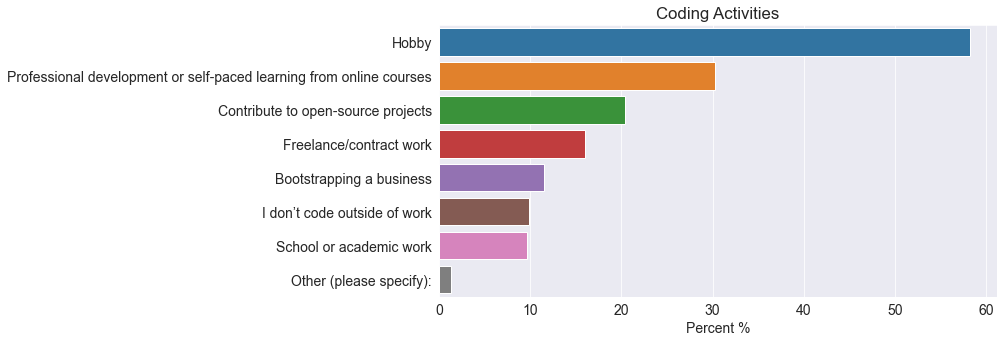

In [140]:
plt.figure(figsize=(10, 5))
sns.barplot(x=coding_activities_percentage, y=coding_activities_percentage.index)
plt.title("Coding Activities")
plt.xlabel('Percent %');

The above graph shows that most of the people code as a `Hobby`, followed by `Professional development` and other activites.

#### Years of Professional Coding

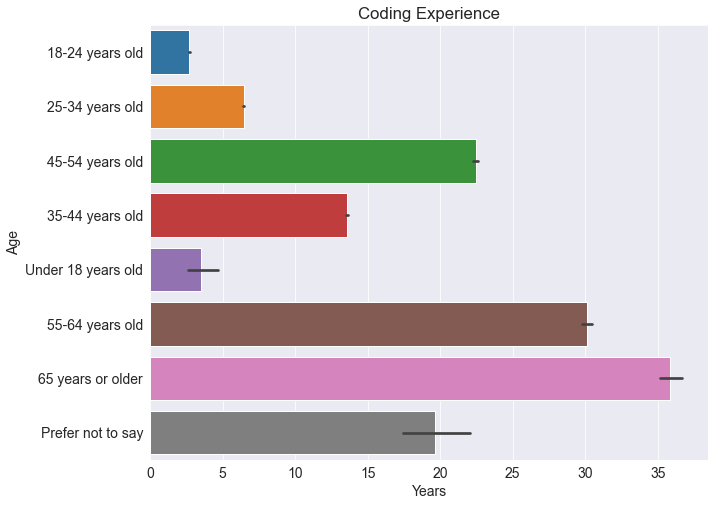

In [124]:
plt.figure(figsize=(10, 8))
sns.barplot(x=survey_df.YearsCodePro, y=survey_df.Age)
plt.title("Coding Experience")
plt.xlabel('Years');

The above graph shows that people with age `65 years or above` have more coding experience than other age groups. 

#### Sources for Learning Code Online

In [128]:
learn_code_df = split_multicolumn(survey_df.LearnCodeOnline)

In [131]:
learn_code_percentage = ((learn_code_df.mean()).sort_values(ascending=False)) * 100

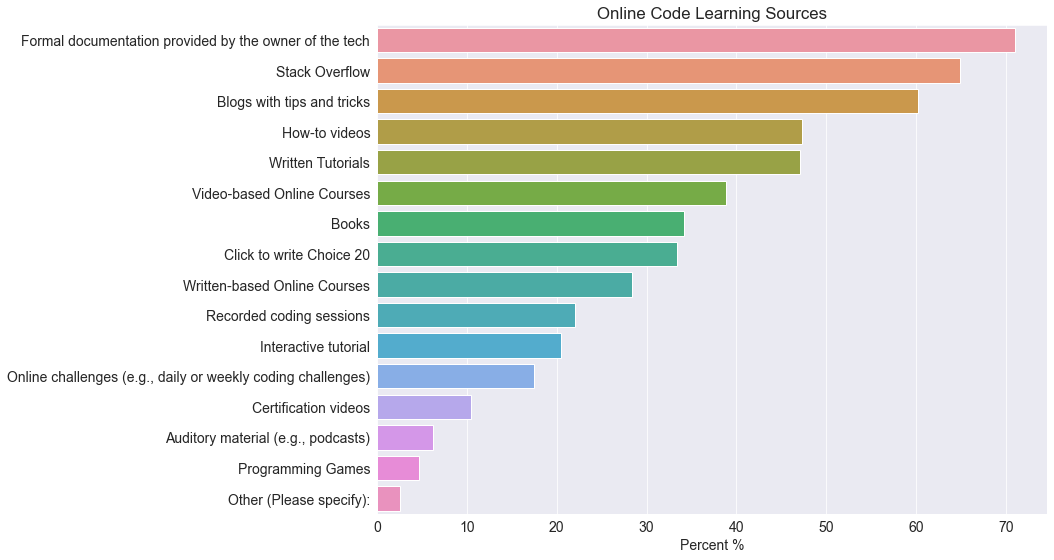

In [136]:
plt.figure(figsize=(12, 9))
plt.xlabel("Percent %")
sns.barplot(x=learn_code_percentage, y=learn_code_percentage.index)
plt.title("Online Code Learning Sources");

The above graph shows that most of the people learn code online by the source of `Formal documnetation provided by the owner of tech` than any other online sources.